In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


### Question 1


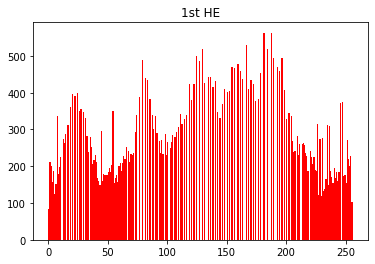

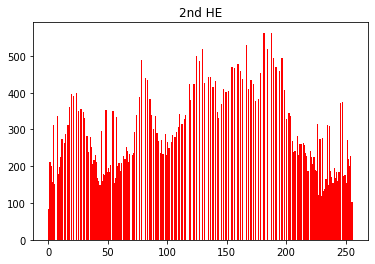

In [2]:
img = cv.imread('lena.jfif', 0)

equ = cv.equalizeHist(img)
equ2 = cv.equalizeHist(equ)
cv.imshow('1st HE', equ)
cv.imshow('2nd HE', equ2)
cv.waitKey(0)
cv.destroyAllWindows()

plt.title('1st HE')
plt.show(plt.hist(equ.ravel(), 256, [0,256], color = 'r'))
plt.title('2nd HE')
plt.show(plt.hist(equ2.ravel(), 256, [0,256], color = 'r'))

Asnwer : There is no difference in the output of the first and second output based on the diagram above.

### Question 2(A)

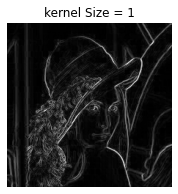

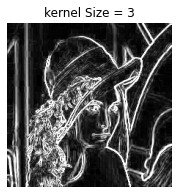

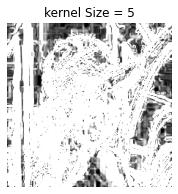

In [36]:
img = cv.imread("lena.jfif",0)

title = ["kernel Size = 1" ,"kernel Size = 3","kernel Size = 5"]
img_list = []
for i in range(1, 6, 2):
    sobel_x = cv.Sobel(img, cv.CV_64F,1,0, ksize = i)
    sobel_y = cv.Sobel(img, cv.CV_64F,0,1, ksize = i)
    grad = cv.magnitude(sobel_x, sobel_y)
    grad = cv.convertScaleAbs(grad)
    img_list.append(grad)
    
for i in range(3):
    plt.figure(figsize=(10, 10))
    plt.subplot(1,3,i+1), plt.imshow(img_list[i], 'gray')
    plt.title(title[i])
    plt.axis('off')
plt.show()

### Question 2(B)

In [200]:
img = cv.imread('lena.jfif', 0)

img_blur = cv.GaussianBlur(img, (5, 5), 0)

sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 3)
sobelx_8u = np.uint8(np.absolute(sobelx))
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 3)
sobely_8u = np.uint8(np.absolute(sobely))

sobelx1 = cv.Sobel(img_blur, cv.CV_64F, 1, 0, ksize = 3)
sobelx_8u1 = np.uint8(np.absolute(sobelx1))
sobely1 = cv.Sobel(img_blur, cv.CV_64F, 0, 1, ksize = 3)
sobely_8u1 = np.uint8(np.absolute(sobely1))

noblurring = np.hstack((sobelx_8u, sobely_8u))
blurring = np.hstack((sobelx_8u1, sobely_8u1))

cv.imshow('With no gaussian blurring ', noblurring)
cv.imshow('With gaussian blurring ', blurring)

cv.waitKey(0)
cv.destroyAllWindows()

### Question 2(C)

In [199]:
img = cv.imread('lena.jfif', 0)

laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_img = np.uint8(np.absolute(laplacian))

cv.imshow('results', laplacian_img)
cv.waitKey(0)
cv.destroyAllWindows()

Answer : The most optimal image processing pathway is sobel operator with gaussian blurring because the image produced is the clearest

### Question 3

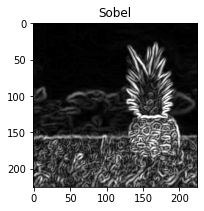

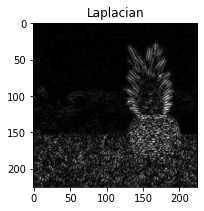

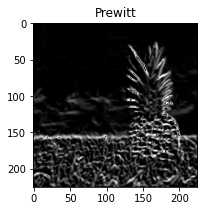

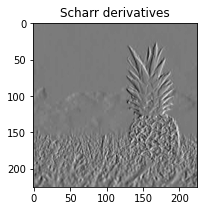

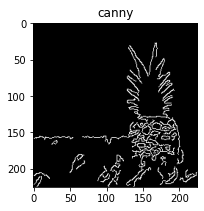

In [204]:
img = cv.imread("pineapple.jfif",0)
img_blur = cv.GaussianBlur(img, (5,5), 0)

kx = np.array([[1,3,1],[0,0,0],[-1,-3,-1]])
ky = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
sx = cv.Sobel(img_blur, cv.CV_64F,1,0, ksize = 3)
sy = cv.Sobel(img_blur, cv.CV_64F,0,1, ksize = 3)
grad = cv.magnitude(sx, sy)
grad = cv.convertScaleAbs(grad)
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)
px = cv.filter2D(img_blur,-1, kx)
py = cv.filter2D(img_blur, -1, ky)
prewitt = px + py
scharr = cv.Scharr(img, cv.CV_64F, 1,0, borderType = cv.BORDER_DEFAULT)
dst = cv.Canny(img_blur, 100, 255, apertureSize = 3)

images = [grad, laplacian_8u, prewitt, scharr,dst]
title = ['Sobel', 'Laplacian','Prewitt','Scharr derivatives','canny']

for i in range(len(images)):
    plt.figure(figsize=(10,10))
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(title[i])
plt.show()

### Question 4


In [12]:
import cv2
import numpy as np

img = cv2.imread("electronic.jfif")

def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img_gray, 184, 23, cv2.THRESH_BINARY)
    img_blur = cv2.GaussianBlur(thresh, (5, 5), 3)
    img_canny = cv2.Canny(img_blur, 0, 0)
    return img_canny

def get_contours(img):
    contours, _ = cv2.findContours(process(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    r1, r2 = sorted(contours, key=cv2.contourArea)[-3:-1]
    x, y, w, h = cv2.boundingRect(np.r_[r1, r2])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

get_contours(img)
cv2.imshow("img_processed", img)
cv2.waitKey(0)
cv2.destroyAllWindows()